In [1]:
import sys
import os

root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root)
print(os.getcwd())

/Users/kashyap/Library/CloudStorage/ProtonDrive-kashyap.suthar07@pm.me-folder/Capstone_Project/models


In [2]:
from utils.preprocessing import load_and_trasnform, preprocessing_data
from utils.save_metrics import save_metrics


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


print("All imports successful!")

All imports successful!


In [3]:
X, y = load_and_trasnform("../data/train.csv")

X_train, X_val, y_trn, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocess = preprocessing_data(X_train)


In [4]:
xgb = XGBRegressor(
    eval_metric="rmse",
    tree_method="hist",
    objective="reg:squarederror",
    subsample=0.5,
    reg_lambda=2.0,
    #reg_alpha=0.5,
    n_estimators=1000,
    min_child_weight=5,
    max_depth=4,
    learning_rate=0.03,
    gamma=0.5,
    colsample_bytree=0.7
)

In [5]:
xgb_pipe = Pipeline([
    ("preprocessor", preprocess),
    ("xgb", xgb),
])

In [6]:
xgb_pipe.fit(X_train,y_trn)
y_val_pred = xgb_pipe.predict(X_val)

In [7]:
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("XGBoost")
print(" MSE: ", mse)
print(" RMSE: ", rmse)
print(" MAE: ", mae)
print(" R2: ", r2)

XGBoost
 MSE:  304088384.0
 RMSE:  17438.13017499296
 MAE:  11919.8544921875
 R2:  0.9043992757797241


In [8]:
save_metrics("XGBoost", mse, rmse, mae, r2)

Saved metrics to /Users/kashyap/Library/CloudStorage/ProtonDrive-kashyap.suthar07@pm.me-folder/Capstone_Project/utils/../metrics/xgboost.json


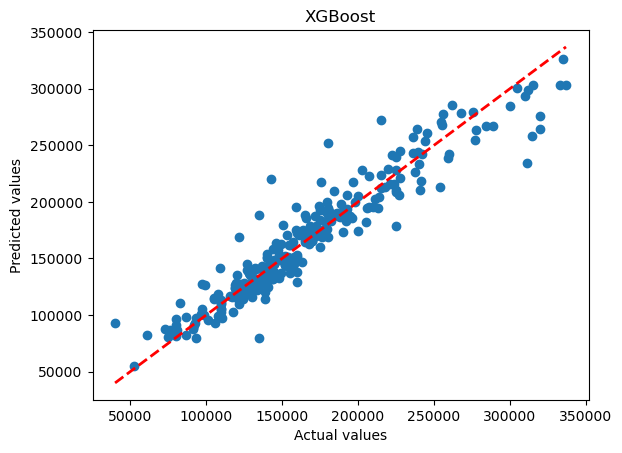

In [9]:
plt.figure()
plt.scatter(y_val, y_val_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("XGBoost")
plt.show()

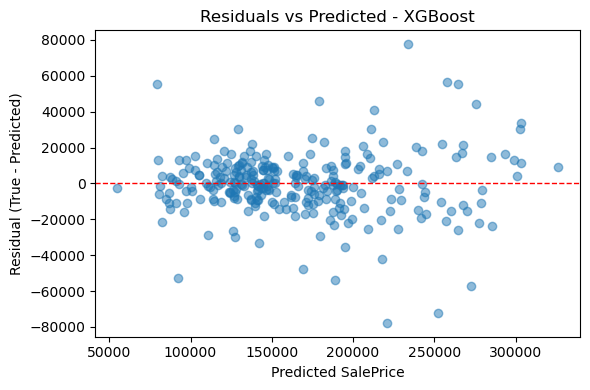

In [10]:
residuals = y_val - y_val_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals vs Predicted - XGBoost")
plt.tight_layout()
plt.show()